In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel 
from statsmodels.stats.power import ttest_power
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

#Problem 3

In [ ]:
gbz1=(3.17-5)/1.5

In [ ]:
gbz1

-1.22

In [ ]:
stats.norm.cdf(-1.22)

0.11123243744783456

In [ ]:
gbz2=(3.6-5)/1.5

In [ ]:
gbz2

-0.9333333333333332

In [ ]:
stats.norm.cdf(-0.93)

0.1761855422452579

In [ ]:
gbz3= (5-5)/1.5
gbz4= (5.5-5)/1.5

In [ ]:
gbz3

0.0

In [ ]:
gbz4

0.3333333333333333

In [ ]:
stats.norm.cdf(gbz4) - stats.norm.cdf(gbz3)

0.13055865981823633

In [ ]:
gbz5= (3-5)/1.5
gbz6= (7.5-5)/1.5

In [ ]:
gbz5

-1.3333333333333333

In [ ]:
gbz6

1.6666666666666667

In [ ]:
stats.norm.cdf(gbz5) - stats.norm.cdf(gbz6)

-0.8609984280013174

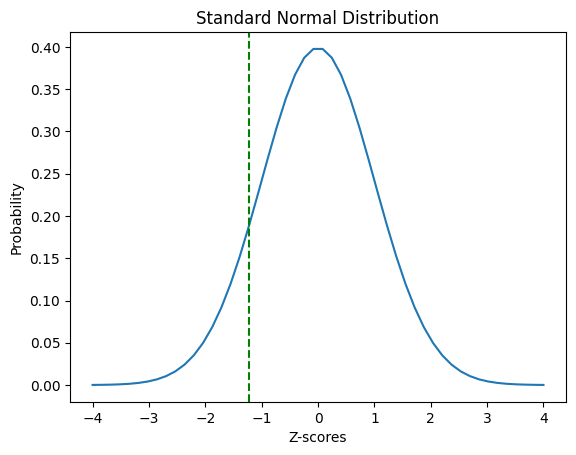

In [ ]:
fig, ax = plt.subplots()
x = np.linspace (-4,4,50)
ax.plot(x, norm.pdf(x, loc=0, scale =1))
ax.set_title ('Standard Normal Distribution')
ax.set_xlabel ('Z-scores')
ax.set_ylabel ('Probability')
ax.axvline (-1.22, ymax=1.5, linestyle= '--', color= 'green')
plt.show()

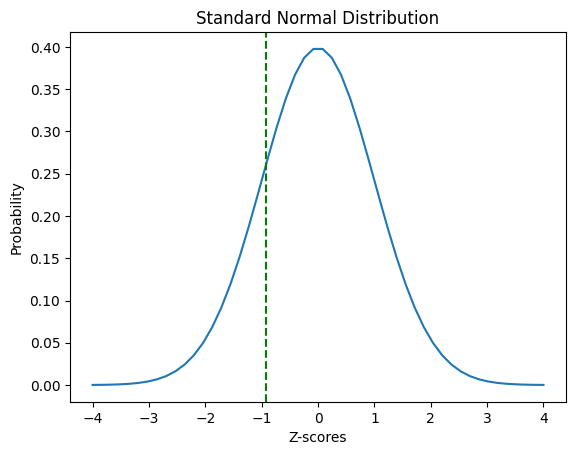

In [ ]:
fig, ax = plt.subplots()
x = np.linspace (-4,4,50)
ax.plot(x, norm.pdf(x, loc=0, scale =1))
ax.set_title ('Standard Normal Distribution')
ax.set_xlabel ('Z-scores')
ax.set_ylabel ('Probability')
ax.axvline (-0.93, ymax=1.5, linestyle= '--', color= 'green')
plt.show()

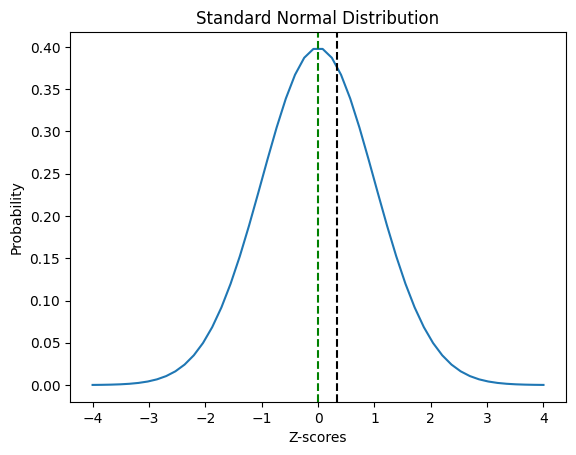

In [ ]:
fig, ax = plt.subplots()
x = np.linspace (-4,4,50)
ax.plot(x, norm.pdf(x, loc=0, scale =1))
ax.set_title ('Standard Normal Distribution')
ax.set_xlabel ('Z-scores')
ax.set_ylabel ('Probability')
ax.axvline (0.0, ymax=1.5, linestyle= '--', color= 'green')
ax.axvline (0.33, ymax=1.5, linestyle= '--', color= 'black')
plt.show()

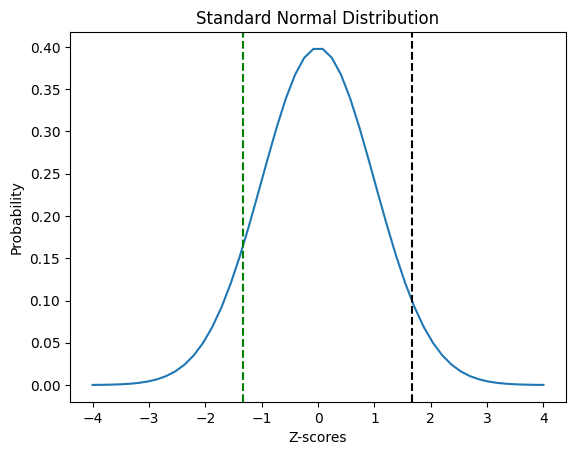

In [ ]:
fig, ax = plt.subplots()
x = np.linspace (-4,4,50)
ax.plot(x, norm.pdf(x, loc=0, scale =1))
ax.set_title ('Standard Normal Distribution')
ax.set_xlabel ('Z-scores')
ax.set_ylabel ('Probability')
ax.axvline (-1.33, ymax=1.5, linestyle= '--', color= 'green')
ax.axvline (1.66, ymax=1.5, linestyle= '--', color= 'black')
plt.show()

#Problem 4

In [ ]:
z=(85-77)/8.5

In [ ]:
z

0.9411764705882353

In [ ]:
stats.norm.cdf(0.11)

0.5437953125423168

In [ ]:
z1=(65-77)/8.5
z2=(87-77)/8.5

In [ ]:
z1

-1.411764705882353

In [ ]:
z2

1.1764705882352942

In [ ]:
stats.norm.cdf(z1) - stats.norm.cdf(z2)

-0.8012869336779058

In [ ]:
x = (0.75 * 8.5) + 77
x

83.375

# Problem 5

In [ ]:
path = '/content/Zingaro_Company.csv'
df= pd.read_csv(path)

Hypotheses:H0:μd=5H1:μd>5


In [ ]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [ ]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [ ]:
df.isna().sum()

Unpolished              0
Treated and Polished    0
dtype: int64

<Axes: xlabel='Unpolished ', ylabel='Density'>

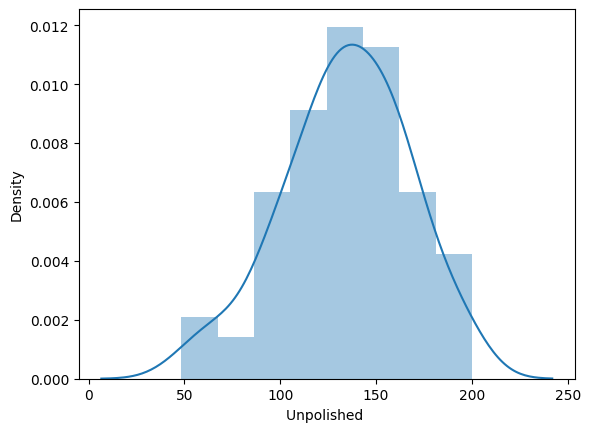

In [ ]:
sns.distplot (df['Unpolished '])

<Axes: xlabel='Treated and Polished', ylabel='Density'>

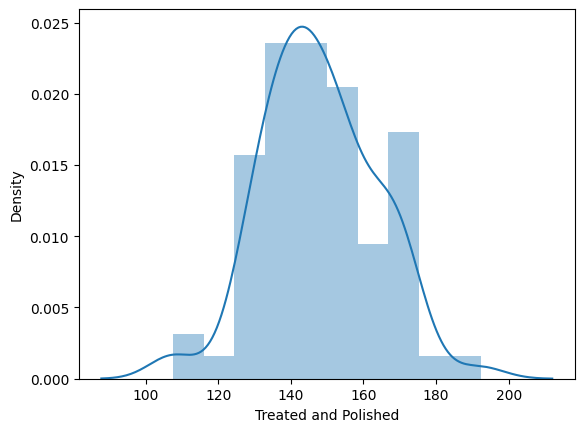

In [ ]:
sns.distplot (df['Treated and Polished'])

In [ ]:
Mean=df['Unpolished '].mean()
print("The mean hardness index of Unpolished stones is", Mean)
t_statistics, p_value1 = stats.ttest_1samp(df['Unpolished '],popmean=150)
p_value= p_value1 /2
print("t_statistic = {} and pvalue = {}".format(round(t_statistics,5), round(p_value,4)))
alpha=0.05
print ("At 5% level of significance,")
if(p_value < alpha):
 print ("We reject Null Hypothesis. Since, Mean hardness index is less than {}".format(150))
else:
 print ("We fail to Reject Null Hypothesis")

The mean hardness index of Unpolished stones is 134.11052653373332
t_statistic = -4.16463 and pvalue = 0.0
At 5% level of significance,
We reject Null Hypothesis. Since, Mean hardness index is less than 150


In [ ]:
X1_mean= df['Unpolished '].mean()
X2_mean= df['Treated and Polished'].mean()
print("The mean hardness index of Unpolished stones is", X1_mean, "The mean hardness index of Treated and Polished", X2_mean)
t_statistic, p_value=stats.ttest_ind (df['Unpolished '],df['Treated and Polished'],equal_var=True)
print("t_statistic= {} and p_value= {}".format(round(t_statistic,3),round(p_value,3)))
alpha=0.05
print ("At 5% level of significance,")
if(p_value < alpha):
 print ("We reject Null Hypothesis.")
else:
 print ("We fail to Reject Null Hypothesis")

The mean hardness index of Unpolished stones is 134.11052653373332 The mean hardness index of Treated and Polished 147.78811718133335
t_statistic= -3.242 and p_value= 0.001
At 5% level of significance,
We reject Null Hypothesis.


#Problem 6

In [ ]:
path = '/content/Aquarius_gym.csv'
adf= pd.read_csv(path)

In [ ]:
adf.head()

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44


In [ ]:
adf['diff'] = adf['After']-adf['Before']


In [ ]:
adf.head()

,Sr no.,Before,After,diff
0,1,39,44,5
1,2,25,25,0
2,3,39,39,0
3,4,6,13,7
4,5,40,44,4


In [ ]:
diff_Mean= adf["diff"].mean()
print ("The mean difference of the total number of pushups is", diff_Mean)
t_statistic, p_value1= stats.ttest_1samp(adf["diff"],popmean=5)
p_value= p_value1 /2
print("t_statistic = {} and p_value = {}".format(round(t_statistic,3),round(p_value,3)))
alpha=0.05
print ("At 5% level of significance,")
if(p_value < alpha):
 print ("We reject Null Hypothesis.")
else:
 print ("We fail to Reject Null Hypothesis")

The mean difference of the total number of pushups is 5.55
t_statistic = 1.915 and p_value = 0.029
At 5% level of significance,
We reject Null Hypothesis.


#Problem 7

In [ ]:
path = '/content/DENTAL_HARDNESS.xlsx'
ddf= pd.read_excel(path)

In [ ]:
ddf.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [ ]:
ddf['Dentist']= pd.Categorical(ddf['Dentist'])
ddf['Method']= pd.Categorical(ddf['Method'])
ddf['Alloy']= pd.Categorical(ddf['Alloy'])
ddf['Temp']= pd.Categorical(ddf['Temp'])

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


In [ ]:
ddf['Dentist'].value_counts()

1    18
2    18
3    18
4    18
5    18
Name: Dentist, dtype: int64

In [ ]:
ddf.groupby('Dentist')["Response"].mean()

Dentist
1    783.055556
2    786.666667
3    748.611111
4    713.666667
5    676.888889
Name: Response, dtype: float64

In [ ]:
ddf['Alloy'].value_counts()

1    45
2    45
Name: Alloy, dtype: int64

In [ ]:
ddf_all2 = ddf[ddf['Alloy'] == 2]

In [ ]:
ddf_all1 = ddf[ddf['Alloy'] == 1]

In [ ]:
ddf_all1.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
6,1,2,1,1500,782
7,1,2,1,1600,698


In [ ]:
ddf_all2.head()

,Dentist,Method,Alloy,Temp,Response
3,1,1,2,1500,907
4,1,1,2,1600,792
5,1,1,2,1700,835
9,1,2,2,1500,1115
10,1,2,2,1600,835


In [ ]:
formula= 'Response ~ C(Dentist)'
model= ols(formula, ddf_all1).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,106683.688889,26670.922222,1.977112,0.116567
Residual,40.0,539593.555556,13489.838889,NaN,NaN


In [ ]:
formula= 'Response ~ C(Dentist)'
model= ols(formula, ddf_all2).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,5.679791e+04,14199.477778,0.524835,0.718031
Residual,40.0,1.082205e+06,27055.122222,NaN,NaN


<ipython-input-17-2cd7d4903648>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot (x= 'Dentist', y= 'Response', data= ddf, hue= 'Alloy', ci= None)


<Axes: xlabel='Dentist', ylabel='Response'>

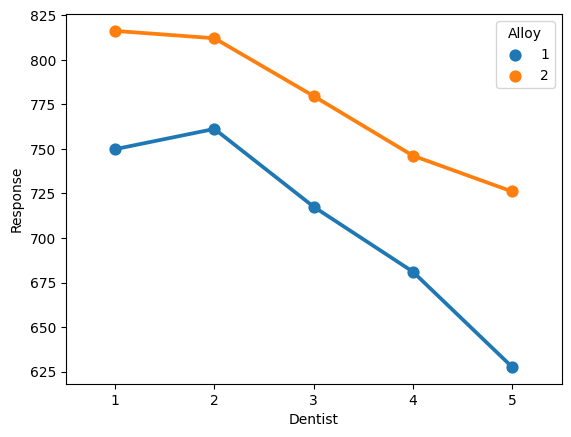

In [ ]:
sns.pointplot (x= 'Dentist', y= 'Response', data= ddf, hue= 'Alloy', ci= None)

In [ ]:
formula= 'Response ~ C(Method)'
model= ols(formula, ddf_all1).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Method),2.0,148472.177778,74236.088889,6.263327,0.004163
Residual,42.0,497805.066667,11852.501587,NaN,NaN


In [ ]:
formula= 'Response ~ C(Method)'
model= ols(formula, ddf_all2).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Method),2.0,499640.4,249820.200000,16.4108,0.000005
Residual,42.0,639362.4,15222.914286,NaN,NaN


<ipython-input-19-5ae8e780973e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot (x= 'Method', y= 'Response', data= ddf, hue= 'Alloy', ci= None)


<Axes: xlabel='Method', ylabel='Response'>

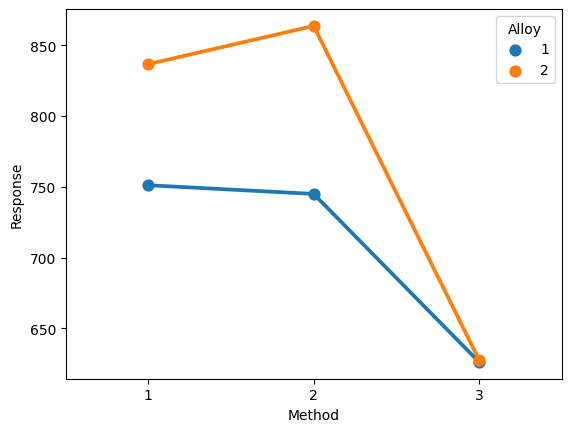

In [ ]:
sns.pointplot (x= 'Method', y= 'Response', data= ddf, hue= 'Alloy', ci= None)

In [ ]:
formula= 'Response ~ C(Temp)'
model= ols(formula, ddf_all1).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Temp),2.0,10154.444444,5077.222222,0.335224,0.717074
Residual,42.0,636122.800000,15145.780952,NaN,NaN


In [ ]:
formula= 'Response ~ C(Temp)'
model= ols(formula, ddf_all2).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Temp),2.0,9.374893e+04,46874.466667,1.883492,0.164678
Residual,42.0,1.045254e+06,24886.996825,NaN,NaN


<ipython-input-4-5f999ad78725>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot (x= 'Temp', y= 'Response', data= ddf, hue= 'Alloy', ci= None)


<Axes: xlabel='Temp', ylabel='Response'>

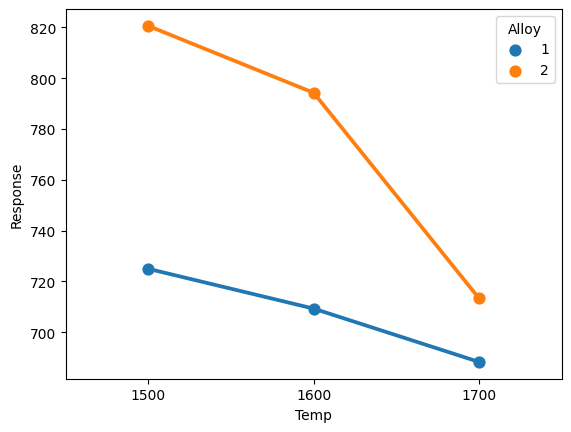

In [ ]:
sns.pointplot (x= 'Temp', y= 'Response', data= ddf, hue= 'Alloy', ci= None)

In [ ]:
formula= 'Response ~ C(Dentist) + C(Method)'
model= ols(formula, ddf_all1).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,106683.688889,26670.922222,2.591255,0.051875
C(Method),2.0,148472.177778,74236.088889,7.212522,0.002211
Residual,38.0,391121.377778,10292.667836,NaN,NaN


In [ ]:
formula= 'Response ~ C(Dentist) + C(Method)'
model= ols(formula, ddf_all2).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist),4.0,56797.911111,14199.477778,0.926215,0.458933
C(Method),2.0,499640.400000,249820.200000,16.295479,0.000008
Residual,38.0,582564.488889,15330.644444,NaN,NaN


<ipython-input-25-edf951b2e829>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot (x= 'Dentist', y= 'Response', data= ddf, hue= 'Method', ci= None)


<Axes: xlabel='Dentist', ylabel='Response'>

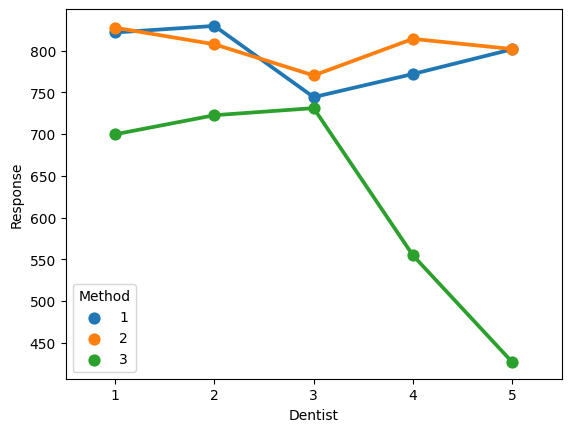

In [ ]:
sns.pointplot (x= 'Dentist', y= 'Response', data= ddf, hue= 'Method', ci= None)

In [ ]:
formula= 'Response ~ C(Dentist):C(Method)'
model= ols(formula, ddf_all1).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist):C(Method),14.0,441097.244444,31506.946032,4.606728,0.000221
Residual,30.0,205180.000000,6839.333333,NaN,NaN


In [ ]:
formula= 'Response ~ C(Dentist):C(Method)'
model= ols(formula, ddf_all2).fit()
aov_table= anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Dentist):C(Method),14.0,753898.133333,53849.866667,4.194953,0.000482
Residual,30.0,385104.666667,12836.822222,NaN,NaN
